In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import leidenalg as la
import configparser

config = configparser.ConfigParser()
config.read('config.ini')

threshold_follower = int(config['clustering']['threshold_follower'])
threshold_count = int(config['clustering']['threshold_count'])
threshold_percentage = float(config['clustering']['threshold_percentage'])

def data_processing(df):
    df = df.sort_values('percentage',ascending=False)
    df = df.reset_index(drop=True)

    ## Add src's & dst's mid information
    df_info = pd.read_csv("data/streamer_info.csv")
    df_info = df_info[['uname','mid']]

    df = pd.merge(df,df_info,how='left',left_on='src',right_on='uname')
    df = pd.merge(df,df_info,how='left',left_on='dst',right_on='uname')

    ## Calculate the reverse of percentage from dst to src
    dict_followers = dict(zip(df.src, df.followers))
    df['followers_dst'] = df['dst'].map(dict_followers)
    df['percentage_reverse'] = df.apply(lambda x: round(x['count'] / dict_followers[x['dst']],3), axis=1)

    ## Rename columns
    df = df[['src', 'dst', 'count', 'type', 'followers', 'percentage', 'percentage_reverse', 'mid_x', 'mid_y','followers_dst']]
    return df

def data_selection(df, threshold=[200,20,0.05]):
    '''function to select data based on threshold
    threshold = [followers, count, percentage]
    '''
    data = df[(df['followers']>2000) & (df['followers_dst']>2000)]
    data = data[(data['count']>20)]
    data = data[(data['percentage']>0.05)]
    # data = data[(data['percentage']>0.05) & (data['percentage_inv']>0.05)]
    # data = data[(data['percentage']>0.05) | (data['percentage_inv']>0.05)]
    data = data[['src','dst','count','percentage']]
    return data

In [2]:
df = pd.read_csv("data/result.csv")
df = data_processing(df)
data = data_selection(df, threshold=[threshold_follower, threshold_count, threshold_percentage])

In [3]:
df

,src,dst,count,type,followers,percentage,percentage_reverse,mid_x,mid_y,followers_dst
0,莞儿睡不醒,露早GOGO,2785,fans,3296,0.845,0.367,1875044092,1669777785,7581
1,虞莫MOMO,露早GOGO,3169,fans,3824,0.829,0.418,1811071010,1669777785,7581
2,莞儿睡不醒,米诺高分少女,2713,fans,3296,0.823,0.345,1875044092,1778026586,7856
3,虞莫MOMO,米诺高分少女,3055,fans,3824,0.799,0.389,1811071010,1778026586,7856
4,露娜Luna_Official,露米Lumi_Official,1296,fans,1632,0.794,0.291,1908273021,2000609327,4461
...,...,...,...,...,...,...,...,...,...,...
237019,卡特亚,飞鸟尤卡里Official,3,fans,6690,0.000,0.022,43222001,1828506816,136
237020,多多poi丶,傻虾小可爱,1,fans,6570,0.000,0.004,11253297,23508383,270
237021,卡特亚,杜铂雷Dobre,1,fans,6690,0.000,0.000,43222001,1294678093,2187
237022,多多poi丶,-_蓝天_-,1,fans,6570,0.000,0.003,11253297,141596701,308


In [4]:
data

,src,dst,count,percentage
0,莞儿睡不醒,露早GOGO,2785,0.845
1,虞莫MOMO,露早GOGO,3169,0.829
2,莞儿睡不醒,米诺高分少女,2713,0.823
3,虞莫MOMO,米诺高分少女,3055,0.799
5,柚恩不加糖,露早GOGO,3125,0.794
...,...,...,...,...
22493,雾深Girimi,神楽Mea_NHOTBOT,128,0.051
22497,胡桃Usa,中单光一,111,0.051
22502,胡桃Usa,EdmundDZhang,112,0.051
22522,ywwuyi,雪绘Yukie,118,0.051


In [5]:
## Create graph
print("Number of nodes: ", len(data['src'].unique()))
tuples = [tuple(x) for x in data[['src','dst','percentage']].values]
Gm = ig.Graph.TupleList(tuples, directed = True, edge_attrs = ['percentage'])

Number of nodes:  207


In [6]:
## Show graph
ig.plot(Gm, bbox = (300, 300), vertex_label_dist=1, vertex_label_size=8,
        vertex_size=4, vertex_color=['red'],
        edge_width=0.5, edge_arrow_size=0.5, edge_arrow_width=0.5)
        

In [7]:
## Clustering by Modularity
partition = la.find_partition(Gm, la.ModularityVertexPartition)
# partition = la.find_partition(Gm, la.ModularityVertexPartition, max_comm_size=10)
# partition = la.find_partition(Gm, la.CPMVertexPartition, resolution_parameter = 0.65) 
print(partition)

Clustering with 214 elements and 12 clusters
[ 0] 石凯kk, 蒲熠星, 文韬Stefan, 黄子弘凡-Lars, 烤鱼子Official, 少年Pi, Yommyko, C酱です, 奶茶☆,
     Asaki大人, hanser, 泠鸢yousa, 花园花玲, 宴宁ccccc, shourei小N, 多多poi丶, 神奇陆夫人, 小绝,
     EdmundDZhang, 花少北丶, 某幻君, 老番茄, 企鹅带带北极熊, 雷雨Lyy, 棉花大哥哥, 大祥哥来了, KB呆又呆,
     小紫才没有摸鱼, LexBurner, 卡特亚, v猫诺v, 黑桐谷歌, 逍遥散人, Leah莉娅又迟到啦, 小霖QL, 清歌清歌-,
     猫神辣椒酱, 守护茶茶, -纯黑-, 自由魂儿儿儿, 痒局长, 杆菌无敌, 两仪滚, 小深深儿, 菠萝赛东°, 一只小仙若, 狗狗狗雨, 原神,
     叶落莫言
[ 1] 莞儿睡不醒, 露早GOGO, 虞莫MOMO, 米诺高分少女, 柚恩不加糖, 贝拉kira, 嘉然今天吃什么, 乃琳Queen, 向晚大魔王,
     安可anko_Official, 星瞳_Official, 宣小纸不怕火, 卡缇娅也不知道鸭, 小可学妹, 阿梓从小就很可爱, 恬豆发芽了,
     蕾蕾大表哥, 棋士连笑, 棋手战鹰, dodo_Official, 露米Lumi_Official, 七海Nana7mi,
     永恒娘Official, 柯洁, 雫るる_Official, 扇宝, 草莓猫Taffy, 永雏塔菲, 東雪蓮Official, 明前奶绿,
     妙妙子Official, AIChannel中国绊爱, 啵啵小狗341, 骑虎者DC, 夏夏大魔王_Axx, LGD_Ame, longdd黄翔
[ 2] 呜米, 咩栗, 奈奈莉娅Channel, 雪狐桑, 托尔赛斯Taurus, 路希维德Wiede, 黎歌Neeko, 星汐Seki,
     东爱璃Lovely, 希月萌奈, 蕾尔娜Leona, 白神遥Haruka, 小小约yoo, 杜松子_Gin, 艾露露Ailurus, 早稻叽,
     夏川玥玥Official, 奈姬niki, 穆小泠Official, 有棵里里, Biso

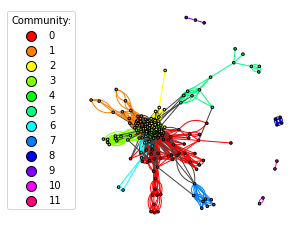

In [8]:
## Draw graph with clustering
def plot_graph(g, communities):
    num_communities = len(communities)
    palette = ig.RainbowPalette(n=num_communities)
    for i, community in enumerate(communities):
        g.vs[community]["color"] = i
        community_edges = g.es.select(_within=community)
        community_edges["color"] = i
    
    fig, ax = plt.subplots()
    ig.plot(
        communities,
        palette=palette,
        edge_width=1,
        target=ax,
        vertex_size=0.3,
    )
    # Create a custom color legend
    legend_handles = []
    for i in range(num_communities):
        handle = ax.scatter(
            [], [],
            s=100,
            facecolor=palette.get(i),
            edgecolor="k",
            label=i,
        )
        legend_handles.append(handle)
    ax.legend(
        handles=legend_handles,
        title='Community:',
        bbox_to_anchor=(0, 1.0),
        bbox_transform=ax.transAxes,
    )
    plt.show()

plot_graph(Gm, partition)

In [9]:
## Clustering by CPM (Community Preserving Modularity) using optimiser
optimiser = la.Optimiser()
profile = optimiser.resolution_profile(Gm, la.CPMVertexPartition, resolution_range=(0,1))

657it [00:05, 124.54it/s, resolution_parameter=0.00165]


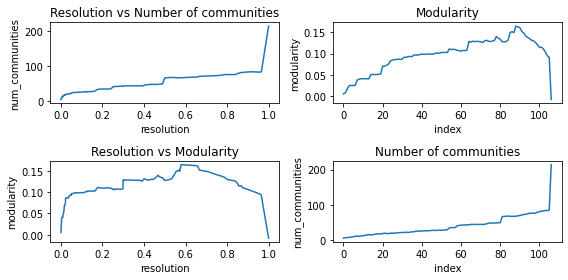

Number of communities:  107


In [10]:
def CPM_summary(profile):
    '''function to plot the summary of CPM clustering
    profile: the profile of CPM clustering,
    return: a dictionary of the summary
        - 'resolution': the resolution parameter
        - 'num_communities': the number of communities
        - 'modularity': the modularity, must be y-axis
        - 'index': the index of the profile'''

    num_communities = [len(p) for p in profile]
    modularity = [p.modularity for p in profile]
    resolution = [p.resolution_parameter for p in profile]
    index = list(range(len(profile)))
    dict_summary = {'index': index,
                    'num_communities':num_communities, 'modularity':modularity, 'resolution':resolution,}

    fig, axs = plt.subplots(2, 2)
    fig.set_size_inches(8, 4)
    axs[0, 0].plot(resolution, num_communities)
    axs[0, 0].set(xlabel='resolution', ylabel='num_communities')
    axs[0, 0].set_title('Resolution vs Number of communities')
    axs[0, 1].plot(index, modularity)
    axs[0, 1].set_title('Modularity')
    axs[0, 1].set(xlabel='index', ylabel='modularity')
    axs[1, 0].plot(resolution, modularity)
    axs[1, 0].set_title('Resolution vs Modularity')
    axs[1, 0].set(xlabel='resolution', ylabel='modularity')
    axs[1, 1].plot(index, num_communities)
    axs[1, 1].set_title('Number of communities')
    axs[1, 1].set(xlabel='index', ylabel='num_communities')
    plt.tight_layout()
    plt.show()

    print("Number of communities: ", len(profile))
    return dict_summary

summary = CPM_summary(profile)

In [24]:
summary['modularity'].index(max(summary['modularity']))

88

In [31]:
88**0.25

3.062814313608786

In [45]:
## Select the best partition
partition = profile[105] # manually select
# partition = profile[summary['modularity'].index(max(summary['modularity']))]
print(f"resultion: {round(partition.resolution_parameter,4)}, modularity: {round(partition.modularity,5)}")
print(partition)

resultion: 0.9654, modularity: 0.09048
Clustering with 214 elements and 85 clusters
[ 0] 呜米, 咩栗, 小可学妹, 奈奈莉娅Channel, 雪狐桑, 路希维德Wiede, 东爱璃Lovely, 希月萌奈, 蕾尔娜Leona,
     白神遥Haruka, 杜松子_Gin, 小柔Channel, 早稻叽, 穆小泠Official, 梦音茶糯, 兰音Reine,
     冥冥meichan, 折原露露, 陆鳐LuLu
[ 1] 魔狼咪莉娅, 鈴宮鈴, 古守血遊official, 乙女音Official, 椎名菜羽Official, 夏诺雅_shanoa, 冰糖IO,
     花园Serena, 有栖Mana_Official, HiiroVTuber, 钉宫妮妮Ninico, 物述有栖Official,
     恋乃夜舞_propro, 茉吱Mojuko, 猫芒ベル_Official, 花丸晴琉Official, 星宮汐Official
[ 2] 千春_Chiharu, 秋凛子Rinco, 星汐Seki, 红晓音Akane, 雾深Girimi, 勾檀Mayumi, 艾露露Ailurus,
     巴老师的小号, 雪绘Yukie, 黑泽诺亚NOIR, 胡桃Usa, 奈姬niki
[ 3] 莞儿睡不醒, 虞莫MOMO, 柚恩不加糖, 安可anko_Official, 星瞳_Official, 卡缇娅也不知道鸭, 恬豆发芽了, 明前奶绿
[ 4] 露早GOGO, 米诺高分少女, 贝拉kira, 嘉然今天吃什么, 乃琳Queen, 向晚大魔王, 七海Nana7mi
[ 5] 张恩恩NNN, 尤格Yog, 罗伊_Roi, 舒三妈Susam, 桃星Tocci, 杜铂雷Dobre, 塔克Tako
[ 6] 石凯kk, 蒲熠星, 文韬Stefan, 黄子弘凡-Lars, KB呆又呆
[ 7] 花花Haya, 月隐空夜, 艾尔莎_Channel, 木糖纯Official, 依然小智
[ 8] hanser, 泠鸢yousa, 宴宁ccccc, shourei小N, 多多poi丶
[ 9] 眞白花音_Official, 美月もも, 雫るる_Official, 神楽Mea_NHOTBOT
[

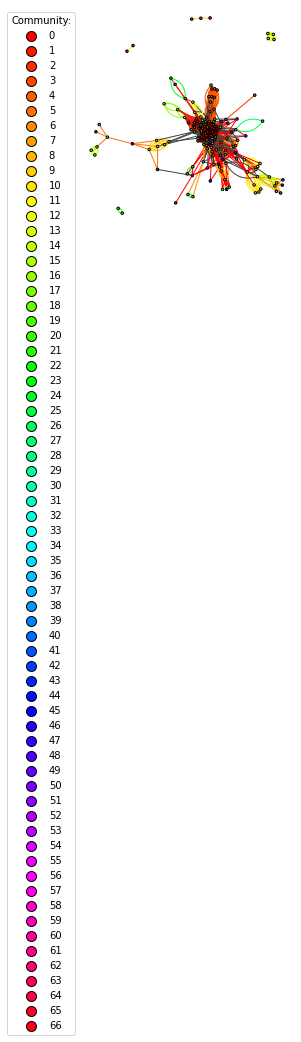

In [12]:
plot_graph(Gm, partition)